<a href="https://colab.research.google.com/github/TAEJIN-KANG/-001-/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_20248191_%EA%B0%95%ED%83%9C%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


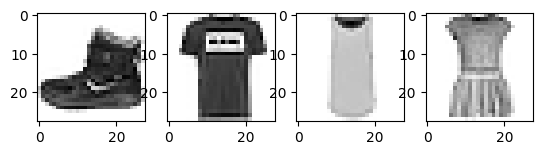

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

In [6]:
print(train_labels[0])
print(train_labels[1])
print(train_labels[2])
print(train_labels[3])
print(train_labels[:4])

9
0
0
3
[9 0 0 3]


In [10]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(100, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images = train_images / 255.0
test_images = test_images / 255.0

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7778 - loss: 0.6182
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8636 - loss: 0.3681
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8769 - loss: 0.3305
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8857 - loss: 0.3092
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8945 - loss: 0.2813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8999 - loss: 0.2718
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9010 - loss: 0.2613
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9092 - loss: 0.2450
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9099 - loss: 0.2372
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9109 - loss: 0.2303
313/313 - 1s - 2ms/step - accuracy: 0.8774 - loss: 0.3505
Test accuracy: 0.8773999810218811


In [13]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255.0, test_images / 255.0

model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size=(3,3),padding = 'same',
                        filters=32),
                          keras.layers.MaxPooling2D((2,2), strides=2),
                          #MaxPlooling2D((3,3), strides=2)
                          #MaxPlooling2D((2,2), strides=3)
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                              padding = 'same'),
                          keras.layers.MaxPooling2D((2,2), strides=2),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                                              padding = 'same'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(32, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 46ms/step - accuracy: 0.5881 - loss: 1.0810 - val_accuracy: 0.8202 - val_loss: 0.5028
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.8412 - loss: 0.4267 - val_accuracy: 0.8585 - val_loss: 0.3789
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.8722 - loss: 0.3510 - val_accuracy: 0.8539 - val_loss: 0.3859
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.8797 - loss: 0.3256 - val_accuracy: 0.8819 - val_loss: 0.3318
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.8880 - loss: 0.3027 - val_accuracy: 0.8802 - val_loss: 0.3247


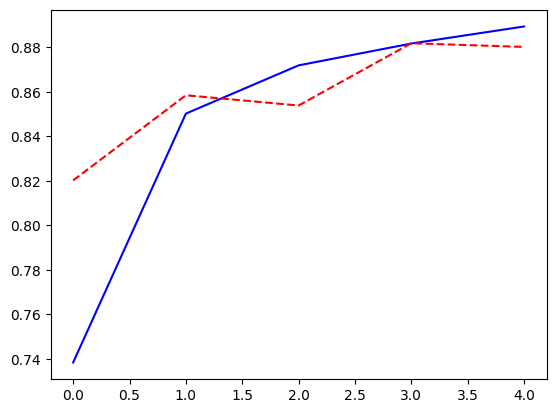

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, epochs=5, validation_split=0.25)

plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print('Test accuracy:', test_acc)

313/313 - 4s - 14ms/step - accuracy: 0.8755 - loss: 0.3503
Test accuracy: 0.8755000233650208


In [19]:
minist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('얘측값 =', pred)
print('실제값 =', test_labels[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
얘측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 7 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


1) MaxPlooling2D((2,2), strides=2) 대신 MaxPlooling2D((3,3), strides=2) 로 했을
경우의 정확도가 어떻게 변하였나요. 변화의 이유

답변 : 정확도가 다소 감소할 가능성이 높습니다.

- 정보 손실 증가
MaxPooling2D((3,3), strides=2)를 사용하면 더 큰 영역에서 최대값을 선택하게 됩니다.
1. 세부 정보 손실: 3x3 영역에서 최대값만 선택하므로, 2x2 영역에 비해 더 많은 정보가 손실됩니다.
2. 특징 표현력 감소: 더 큰 영역에서 정보를 압축하므로, 작은 특징들이 무시될 가능성이 높아집니다.
- 공간적 해상도 감소
3x3 풀링은 2x2 풀링에 비해 더 급격한 해상도 감소를 초래합니다:
1. 위치 정보 손실: 더 넓은 영역에서 정보를 압축하므로, 특징의 정확한 위치 정보가 더 많이 손실됩니다.
2. 과도한 다운샘플링: 입력 데이터의 크기가 크게 줄어들어, 모델이 학습해야 할 패턴을 인식하기 어려워질 수 있습니다.
- 모델 성능에 미치는 영향
1. 과적합 위험: 더 큰 풀링 크기로 인해 모델의 복잡성이 감소하여, 과적합 위험은 줄어들 수 있지만, 동시에 모델의 표현력도 감소할 수 있습니다.
2. 이미지 특성에 따른 영향: 이미지의 특성에 따라 영향이 다를 수 있습니다. 예를 들어, 작은 객체나 세밀한 텍스처가 중요한 경우 3x3 풀링은 성능을 크게 저하시킬 수 있습니다.

결론적으로, MaxPooling2D((3,3), strides=2)는 더 많은 정보를 손실시키고 특징 맵의 해상도를 더 급격히 감소시키므로, 대부분의 경우 2x2 풀링에 비해 정확도가 낮아질 가능성이 높습니다. 그러나 정확한 영향은 데이터셋의 특성과 모델의 전체 구조에 따라 달라질 수 있으므로, 실제 적용 시에는 실험을 통해 검증하는 것이 좋습니다.

2) MaxPlooling2D((2,2), strides=2) 대신 MaxPlooling2D((2,2), strides=3) 로 했을 경
우의 정확도가 어떻게 변하였나요. 변화의 이유

MaxPooling2D((2,2), strides=2)를 MaxPooling2D((2,2), strides=3)으로 변경할 경우, 일반적으로 모델의 정확도가 감소할 가능성이 높습니다. 이러한 변화의 주요 이유는 다음과 같습니다:
- 정보 손실 증가
1. 과도한 다운샘플링: strides=3으로 설정하면 풀링 윈도우가 3픽셀씩 이동하므로, 더 많은 정보가 손실됩니다.
2. 특징 맵 크기 급격한 감소: 출력 크기가 더 작아져 중요한 공간 정보가 손실될 수 있습니다.
- 특징 표현력 저하
1. 중요 특징 누락: 큰 stride로 인해 중요한 특징들이 건너뛰어질 수 있어, 모델의 특징 감지 능력이 저하될 수 있습니다.
2. 공간적 연속성 파괴: 인접한 특징들 간의 관계가 더 많이 손실되어 공간적 연속성이 크게 저하됩니다.
- 모델 성능에 미치는 영향
1. 과소적합 위험: 특징 맵의 급격한 축소로 인해 모델이 데이터의 복잡성을 충분히 학습하지 못할 수 있습니다.
2. 일반화 능력 저하: 과도한 정보 손실로 인해 모델의 일반화 능력이 감소할 수 있습니다.
- 정확도 변화의 정도
정확도 변화의 정도는 데이터셋의 특성과 모델의 전체 구조에 따라 다를 수 있습니다. 일반적으로:
1. 작은 객체 탐지: 작은 객체나 세밀한 특징이 중요한 경우, 정확도 감소가 더 크게 나타날 수 있습니다.
2. 큰 특징 탐지: 큰 특징이나 전체적인 구조가 중요한 경우, 정확도 감소가 상대적으로 적을 수 있습니다.

결론적으로, MaxPooling2D((2,2), strides=3)는 더 공격적인 다운샘플링을 수행하여 정보 손실을 증가시키므로, 대부분의 경우 정확도가 감소할 가능성이 높습니다. 그러나 정확한 영향을 평가하기 위해서는 실제 데이터셋과 모델에 대한 실험이 필요합니다.